In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# data.csv dosyasını bir DATA FRAME'e aktardık.
raw_data = pd.read_csv(r'data.csv')

In [3]:
# Ham veri setinin karışık örnekleminden ilk 8 kaydını sıraladık.
raw_data.sample(frac=1).head(8)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cogs,Gross margin percentage,Gross income,Rating
665,518-17-2983,A,Yangon,Normal,Female,Fashion accessories,48.63,4,9.7260,204.2460,2/4/2019,15:44,Ewallet,194.52,4.761905,9.7260,7.6
545,701-23-5550,B,Mandalay,Member,Male,Home and lifestyle,38.81,4,7.7620,163.0020,3/19/2019,13:40,Ewallet,155.24,4.761905,7.7620,4.9
447,453-12-7053,C,Naypyitaw,Normal,Male,Fashion accessories,45.74,3,6.8610,144.0810,3/10/2019,17:38,Credit card,137.22,4.761905,6.8610,6.5
257,729-09-9681,A,Yangon,Member,Male,Home and lifestyle,25.91,6,7.7730,163.2330,2/5/2019,10:16,Ewallet,155.46,4.761905,7.7730,8.7
788,704-10-4056,C,Naypyitaw,Member,Male,Health and beauty,60.47,3,9.0705,190.4805,1/14/2019,10:55,Credit card,181.41,4.761905,9.0705,5.6
824,109-86-4363,B,Mandalay,Member,Female,Sports and travel,60.08,7,21.0280,441.5880,2/14/2019,11:36,Credit card,420.56,4.761905,21.0280,4.5
755,652-43-6591,A,Yangon,Normal,Female,Fashion accessories,97.29,8,38.9160,817.2360,3/9/2019,13:18,Credit card,778.32,4.761905,38.9160,6.2
918,777-67-2495,B,Mandalay,Normal,Male,Home and lifestyle,68.97,3,10.3455,217.2555,2/22/2019,11:26,Ewallet,206.91,4.761905,10.3455,8.7


In [4]:
# Data Frame'in genel bilgilerini listeledik
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  Cogs                     1000 non-null   float64
 14  Gross margin percentage  

In [5]:
# Veri tipi numerik olan bütün kolonlar farklı bir data frame'e aktarıldı
numerical_df = raw_data.select_dtypes(include=['float64', 'int64'])
numerical_df.head()

,Unit price,Quantity,Tax 5%,Total,Cogs,Gross margin percentage,Gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [6]:
# Numerik olan data frame üzeinde her kolonun istatistik bilgileri listelendi.
for col in numerical_df.columns:
    print(f'Column name \t→\t {col.upper()}')
    print(numerical_df[col].describe())
    print(f"{'---' * 20} \n")

Column name 	→	 UNIT PRICE
count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64
------------------------------------------------------------ 

Column name 	→	 QUANTITY
count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64
------------------------------------------------------------ 

Column name 	→	 TAX 5%
count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax 5%, dtype: float64
------------------------------------------------------------ 

Column name 	→	 TOTAL
count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       25

In [7]:
# Veri tipi object olan kolonlar farklı bir data frame'e akatrıldı
categorical_df = raw_data.select_dtypes(include=['object']).drop(columns=['Invoice ID', 'Date', 'Time'])
categorical_df.head()

,Branch,City,Customer type,Gender,Product line,Payment
0,A,Yangon,Member,Female,Health and beauty,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,A,Yangon,Member,Male,Health and beauty,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,Ewallet


In [8]:
# Kategorik değer bulunduran kolonların value_conts özellikleri listelendi.
for col in categorical_df.columns:
    print(f'Column name \t→\t {col.upper()}')
    print(raw_data[col].value_counts())
    print(f"{'---' * 20} \n")

Column name 	→	 BRANCH
A    340
B    332
C    328
Name: Branch, dtype: int64
------------------------------------------------------------ 

Column name 	→	 CITY
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
------------------------------------------------------------ 

Column name 	→	 CUSTOMER TYPE
Member    501
Normal    499
Name: Customer type, dtype: int64
------------------------------------------------------------ 

Column name 	→	 GENDER
Female    501
Male      499
Name: Gender, dtype: int64
------------------------------------------------------------ 

Column name 	→	 PRODUCT LINE
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
------------------------------------------------------------ 

Column name 	→	 PAYMENT
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dty

## CORRELATION
---

In [9]:
# Ham verinin Korelasyon tablosunu oluşturduk
raw_data_corr = raw_data.corr()
raw_data_corr

,Unit price,Quantity,Tax 5%,Total,Cogs,Gross margin percentage,Gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


Yukarıdaki Korelasyon(İlişki) tablosuna göre __gross margin percentage__ değeri sabit olduğu için hiçbir kolonla ilişkisi yoktur.

In [10]:
# Kategorik olan veriler one hot encoding yapıldı.
encoded_data = pd.get_dummies(data=raw_data, columns=list(categorical_df.columns))

# encoded_data = pd.concat([encoded_data, numerical_df])

In [11]:
encoded_corr = encoded_data.corr()

In [12]:
# one hot encoding yapılmış data frame'in korelasyonları hesaplandı.
encoded_corr = encoded_corr.drop('Gross margin percentage', axis=0).drop('Gross margin percentage', axis=1)
encoded_corr.T

,Unit price,Quantity,Tax 5%,Total,Cogs,Gross income,Rating,Branch_A,Branch_B,Branch_C,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778,-0.024157,-0.000342,0.024717,...,0.015445,-0.036240,0.026034,0.005836,-0.013072,-0.005854,0.022257,0.029721,-0.032415,0.001865
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815,-0.010403,-0.006773,0.017291,...,-0.074258,0.031250,-0.070485,-0.006084,0.015709,0.027446,0.004912,0.000403,0.006203,-0.006443
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.030994,-0.008876,0.040176,...,-0.049451,-0.006140,-0.033850,-0.000551,0.001165,0.024276,0.016517,0.009474,0.002852,-0.012244
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.030994,-0.008876,0.040176,...,-0.049451,-0.006140,-0.033850,-0.000551,0.001165,0.024276,0.016517,0.009474,0.002852,-0.012244
Cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.030994,-0.008876,0.040176,...,-0.049451,-0.006140,-0.033850,-0.000551,0.001165,0.024276,0.016517,0.009474,0.002852,-0.012244
Gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.030994,-0.008876,0.040176,...,-0.049451,-0.006140,-0.033850,-0.000551,0.001165,0.024276,0.016517,0.009474,0.002852,-0.012244
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000,0.022714,-0.063462,0.040740,...,0.004800,-0.012645,0.015310,0.037546,0.007540,-0.034351,-0.014658,-0.001114,0.011935,-0.010509
Branch_A,-0.024157,-0.010403,-0.030994,-0.030994,-0.030994,-0.030994,0.022714,1.000000,-0.505997,-0.501441,...,0.039434,0.012364,-0.052539,-0.006459,-0.027518,0.061037,0.014524,-0.030929,-0.007935,0.038635
Branch_B,-0.000342,-0.006773,-0.008876,-0.008876,-0.008876,-0.008876,-0.063462,-0.505997,1.000000,-0.492530,...,0.018398,-0.008140,0.016121,-0.043510,0.014999,-0.018072,0.039310,-0.018810,0.026368,-0.006879
Branch_C,0.024717,0.017291,0.040176,0.040176,0.040176,0.040176,0.040740,-0.501441,-0.492530,1.000000,...,-0.058243,-0.004310,0.036841,0.050161,0.012720,-0.043459,-0.054086,0.050075,-0.018442,-0.032082


## DATA VISUALIZATION
---

In [13]:
# Sadece sayısal olan verilerin korelasyonları hesaplandı
corr = raw_data_corr.drop('Gross margin percentage', axis=0).drop('Gross margin percentage', axis=1)

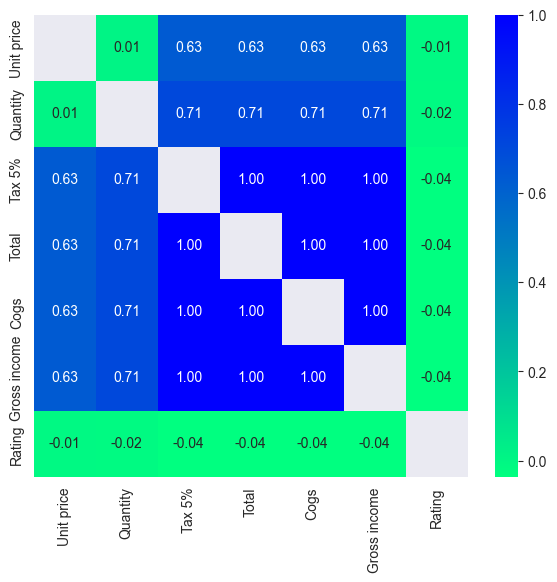

In [14]:
# Korelasyon verileri heatmap ile görselleştirildi.
plt.subplots(figsize=(7, 6))

mask = np.zeros_like(corr)
mask[np.diag_indices_from(mask)] = True

sns.heatmap(corr, annot=True, fmt='.2f', cmap='winter_r', mask=mask);

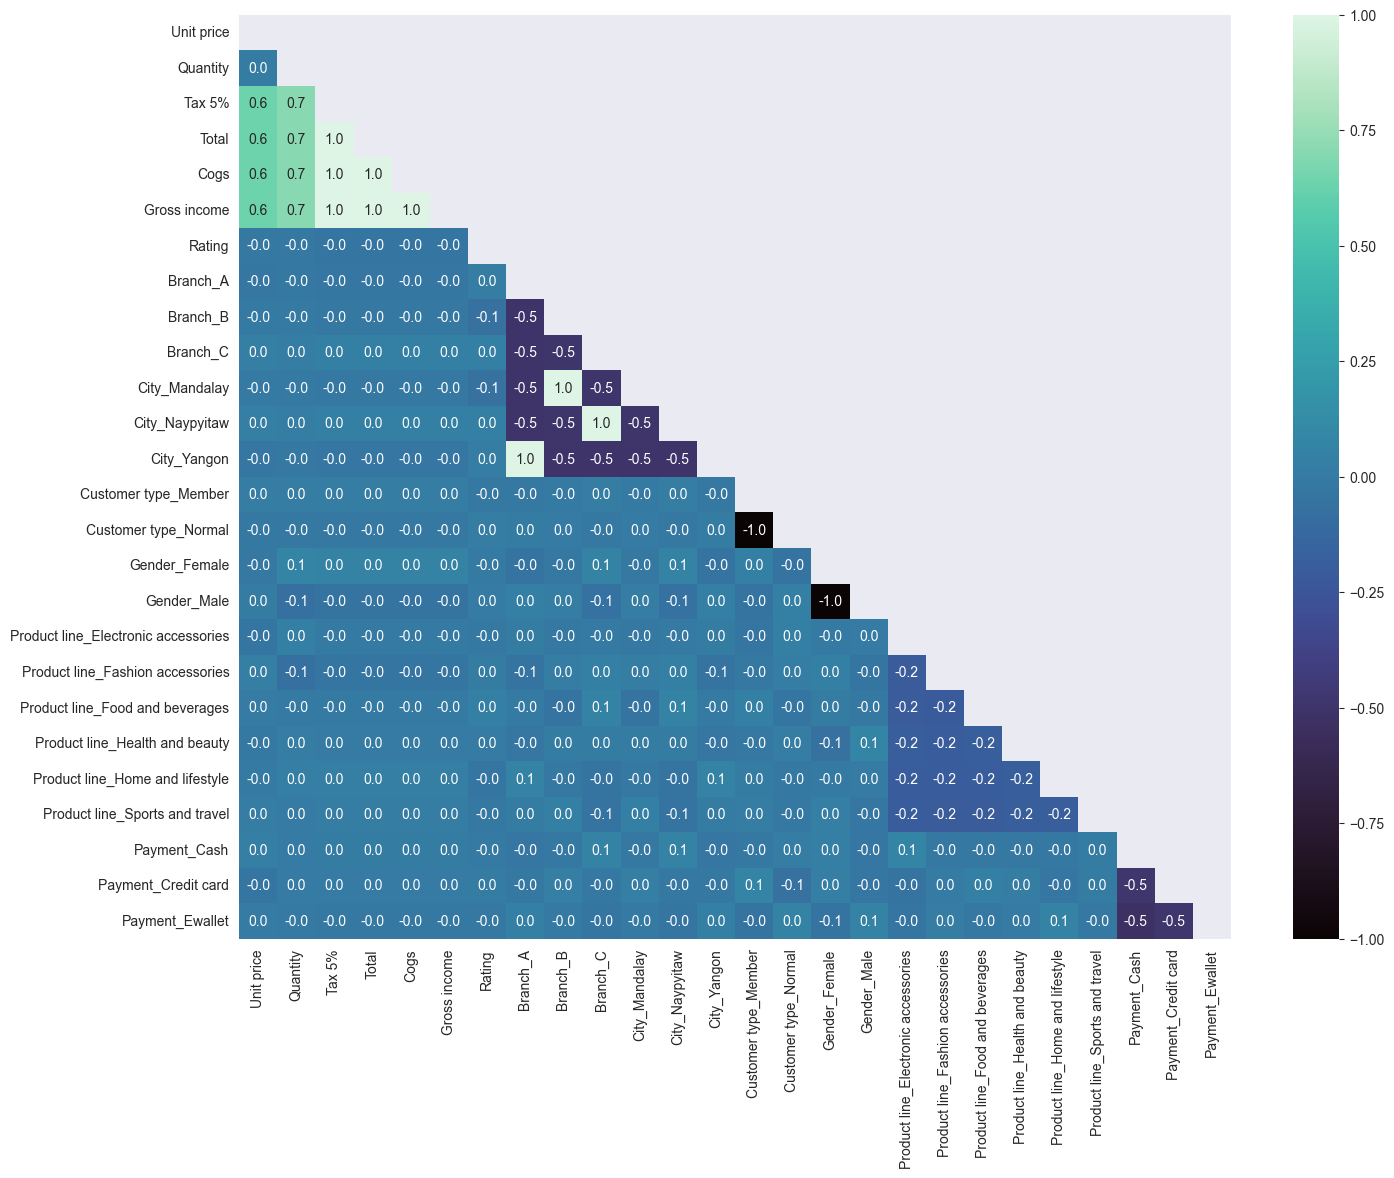

In [15]:
# one hot encoding işlemi yapılmış veri setinin korelasyon verileri heatmap ile görselleştirildi.

plt.subplots(figsize=(16, 12))

mask = np.zeros_like(encoded_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(encoded_corr, annot=True, fmt='.1f', cmap='mako', mask=mask);

<AxesSubplot:xlabel='Gender', ylabel='Rating'>

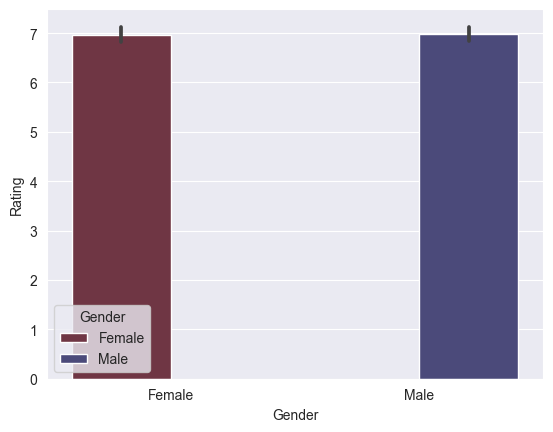

In [16]:
# Cinsiyetlere göre bireylerin verdiği ortalama puan
sns.barplot(x="Gender", y="Rating", hue="Gender", data=raw_data, palette="icefire_r")

In [17]:
raw_data.pivot_table(values=['Rating'], index=['Gender'], aggfunc=np.average)

,Rating
Gender,
Female,6.964471
Male,6.980962


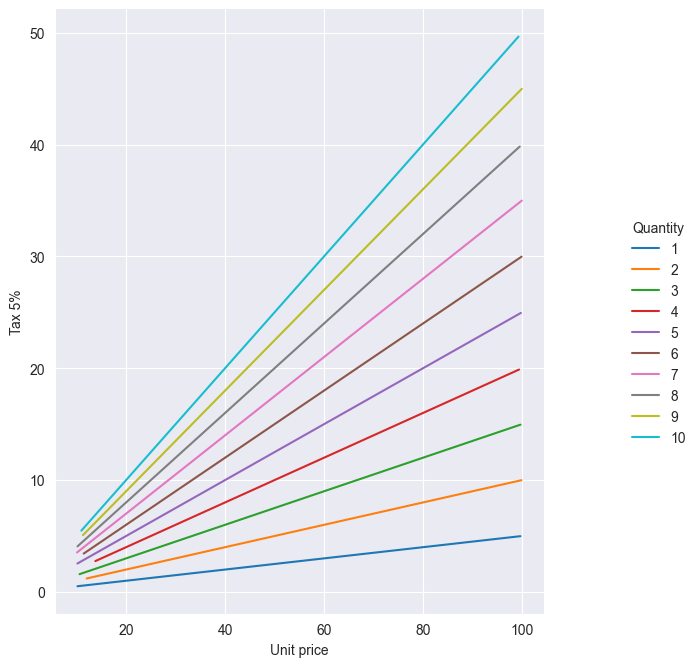

In [18]:
# Birim fiyata göre ödenilen verginin oranınını gösteren grafik
sns.FacetGrid(raw_data, hue='Quantity').map(sns.lineplot, 'Unit price', 'Tax 5%').add_legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Tax 5%'>

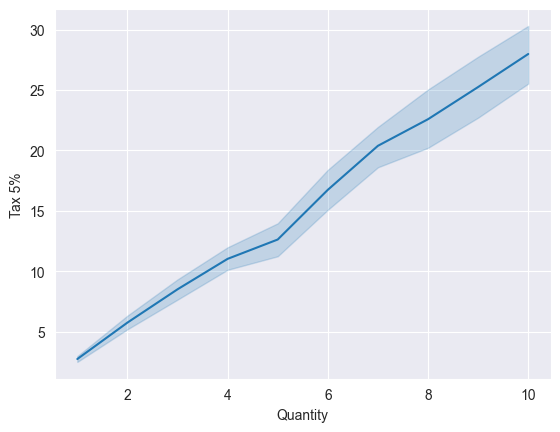

In [19]:
# Birim fiyata göre ödenilen verginin oranınını gösteren grafik - 2
sns.lineplot(data=raw_data, x=raw_data['Quantity'], y=raw_data['Tax 5%'])

In [20]:
raw_data.pivot_table(values=['Tax 5%'], index=['Quantity'], aggfunc=np.average)

,Tax 5%
Quantity,
1,2.739094
2,5.753429
3,8.508833
4,11.030110
5,12.629044
6,16.742082
7,20.384995
8,22.586165
9,25.250234


In [21]:
raw_data['Quantity'].value_counts()

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

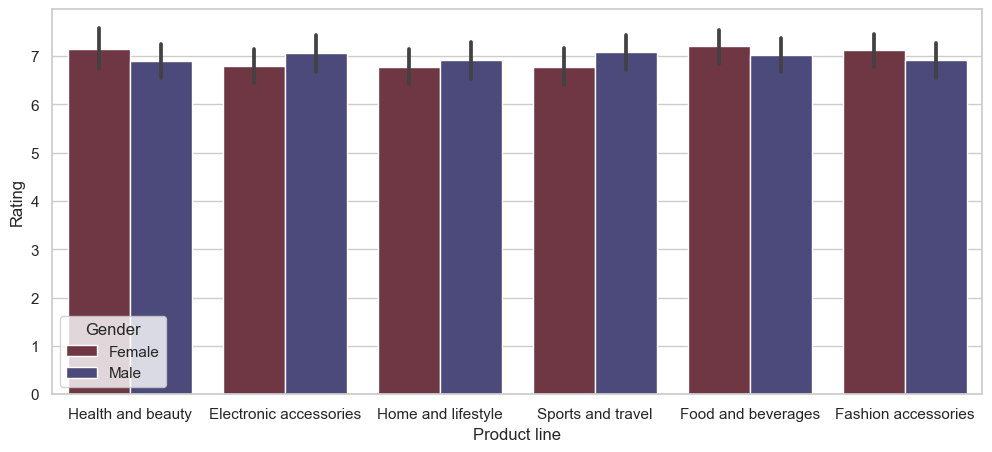

In [22]:
# Ürün Türlerine göre ortalama rating değerleri
sns.set_theme(style="whitegrid", rc={'figure.figsize': (12, 5)})
ax = sns.barplot(x='Product line', y='Rating', data=raw_data, hue='Gender', palette="icefire_r")

<AxesSubplot:xlabel='Product line', ylabel='count'>

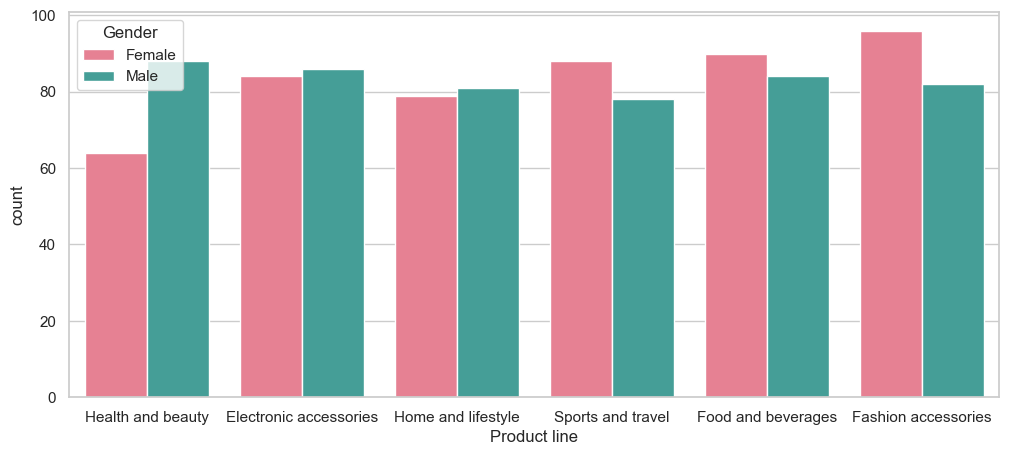

In [23]:
# Ürün türlerine göre satış miktarları
sns.countplot(data=raw_data, x='Product line', hue='Gender', palette="husl")

<AxesSubplot:xlabel='Customer type', ylabel='Rating'>

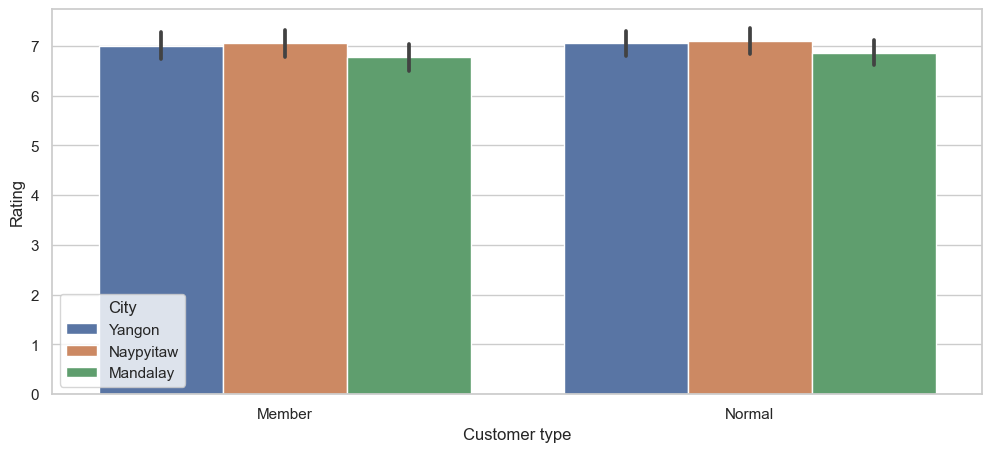

In [24]:
# Üyelik durumuna göre verilen ortalama rating değerleri
sns.barplot(x='Customer type', y='Rating', data=raw_data, hue='City')

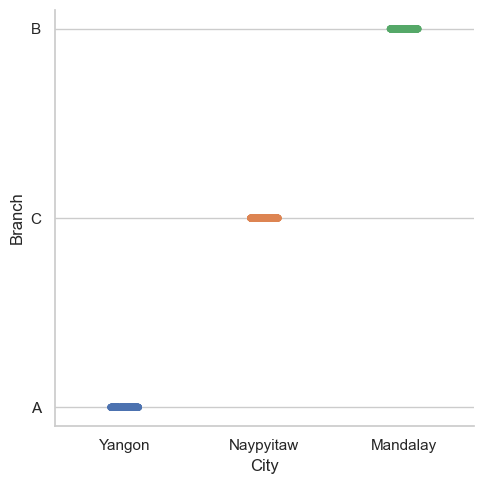

In [25]:
# Şehirler ile Şubeler arasındaki ilişki
sns.catplot(x='City', y='Branch', data=raw_data)

In [26]:
# branch_city data frame'i oluşturuldu
branch_city = pd.DataFrame({'Branch': raw_data['Branch'], 'City': raw_data['City']})

In [27]:
branch_city.sample(frac=1).head()

,Branch,City
55,C,Naypyitaw
249,B,Mandalay
172,C,Naypyitaw
458,C,Naypyitaw
198,C,Naypyitaw


In [28]:
# Branch ve City kolonlarına one hot encoding yapıldı
branch_city = pd.get_dummies(data=branch_city, columns=['Branch', 'City'])

<AxesSubplot:>

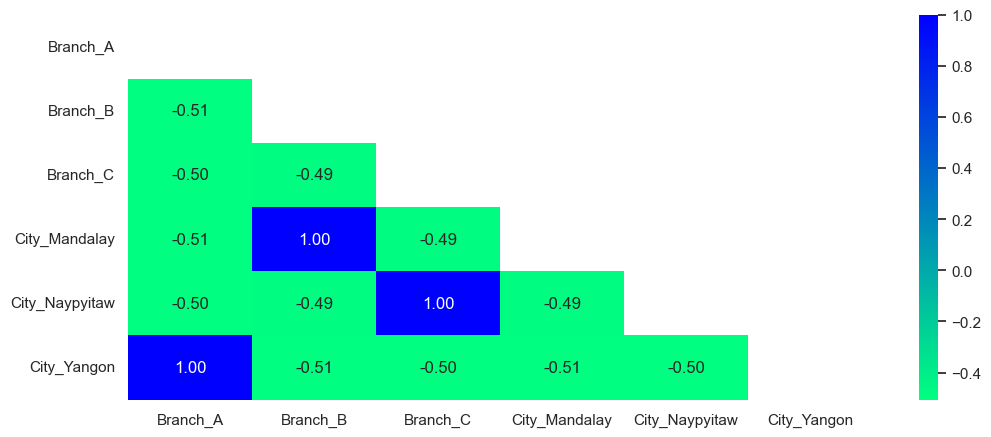

In [29]:
# Branch'ler ile City'ler arası Korelasyon tablosu oluşturuldu.
mask = np.zeros_like(branch_city.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(branch_city.corr(), annot=True, fmt='.2f', cmap='winter_r', mask=mask)

In [30]:
# Korelasyon ilişkisine göre Şubeler, Şehirlere özeldir ve sorgulama yaptığımızda bir şube kendi şehri dışında bulunmamaktadır.
display(branch_city.query("Branch_A == 1 and City_Yangon != 1"))
display(branch_city.query("Branch_B == 1 and City_Mandalay != 1"))
display(branch_city.query("Branch_C == 1 and City_Naypyitaw != 1"))

,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon


,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon


,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon


In [31]:
# Hangi ödeme yönteminden ne kadar tercih ediliyor.
raw_data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

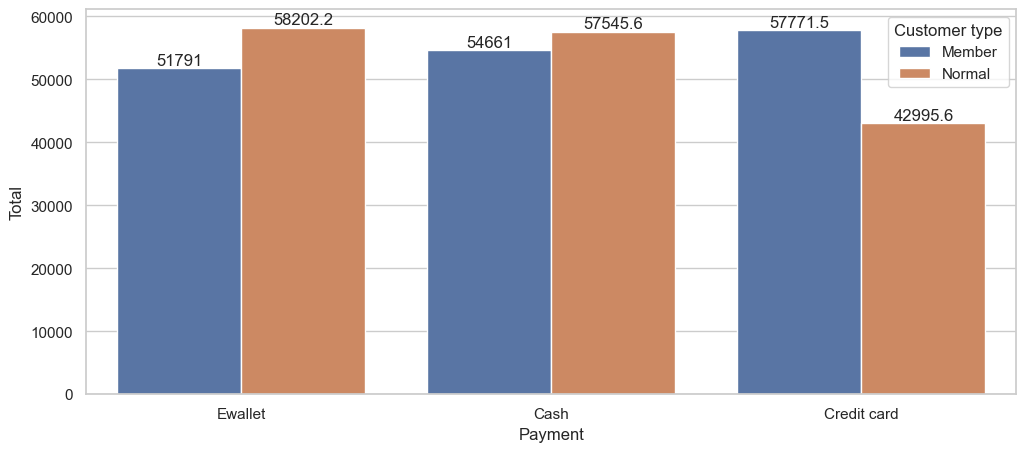

In [89]:
# Ödeme yöntemlerine göre ortalama harcama miktarları
ax = sns.barplot(data=raw_data, x='Payment', y='Total', hue='Customer type', ci=0,  estimator=sum)

for container in ax.containers:
    ax.bar_label(container)

In [33]:
# Rating değerlerini en yakın tam sayıya yuvarladık
ratings = [np.floor(r) for r in raw_data['Rating']]

In [34]:
# Geçici bir data frame oluşturduk
temp = raw_data[['Branch', 'Total', 'Rating']].copy()

In [35]:
temp['Rating'] = ratings

In [36]:
temp.head()

,Branch,Total,Rating
0,A,548.9715,9.0
1,C,80.2200,9.0
2,A,340.5255,7.0
3,A,489.0480,8.0
4,A,634.3785,5.0


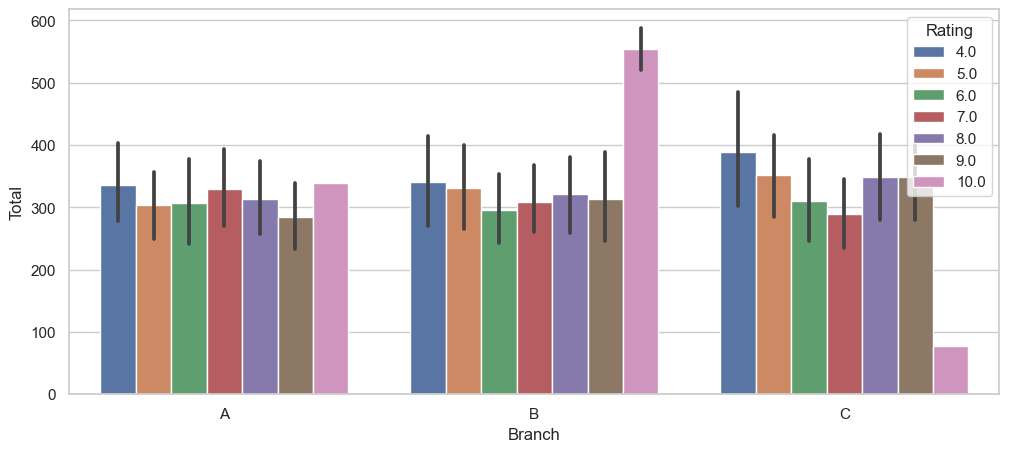

In [37]:
# Bölgelere göre ortalama harcama değerleri ve verilen rating oranları
ax = sns.barplot(data=temp.sort_values('Branch'), x='Branch', y='Total', hue='Rating')

## SHOPPING HABITS OF CUSTOMERS BASED ON BRANCH ( WHICH DAY OF THE WEEK, WHICH HOUR OF THE DAY CUSTOMERS SHOP FREQUENTLY? ETC.. )
---

In [38]:
# Date ve Tİme kolonları time_df veri tabanındaki bir kolonda birleştirildi
time_df = raw_data['Date'] + ' ' + raw_data['Time']
time_df = pd.DataFrame({'Time Stamp': time_df})

In [39]:
# Her verideki time stamp değerinin time bilgisi saat bazında yuvarlandı
rounded_times = []
for i in range(time_df.shape[0]):
    rounded_times.append(pd.Timestamp(time_df.iloc[i][0]).floor(freq='H').time().strftime('%H:%M'))

In [40]:
# yuvarlama yapılan saat bilgileri yeni kolona eklendi
time_df['Rounded Times'] = rounded_times

In [41]:
time_df.head()

,Time Stamp,Rounded Times
0,1/5/2019 13:08,13:00
1,3/8/2019 10:29,10:00
2,3/3/2019 13:23,13:00
3,1/27/2019 20:33,20:00
4,2/8/2019 10:37,10:00


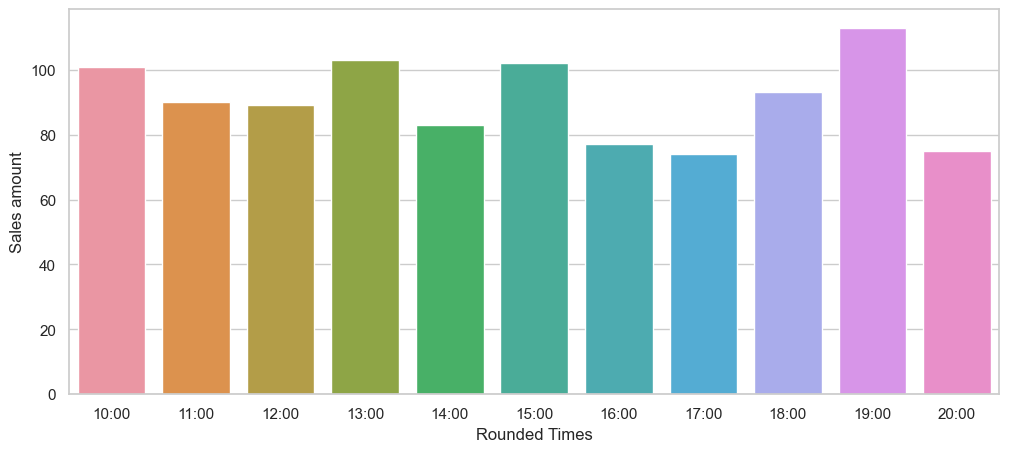

In [42]:
# Saatlere göre toplam satış değerleri grafiğe aktarıldı. 10:00 → (10:00-10.59 arasında alışveriş yapanlar)
ax = sns.countplot(data=time_df.sort_values('Rounded Times'), x='Rounded Times')
ax.set_ylabel('Sales amount')
plt.show()

In [43]:
# Date kolonundaki veileri datetime.strptime fonksiyonu sayesinde haftanın hangi günü olduğu tespit edilip bir diziye aktarıldı ve Data frame oluşturudu.
days = pd.Series([w for w in map(lambda d: datetime.strptime(d, '%m/%d/%Y').strftime('%A'), raw_data['Date'])], name='Day')

numerical_days = days.replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], range(1, 8))

df_days = pd.DataFrame({'days': days, 'num': numerical_days})

In [44]:
df_days.head(8)

,days,num
0,Saturday,6
1,Friday,5
2,Sunday,7
3,Sunday,7
4,Friday,5
5,Monday,1
6,Monday,1
7,Sunday,7


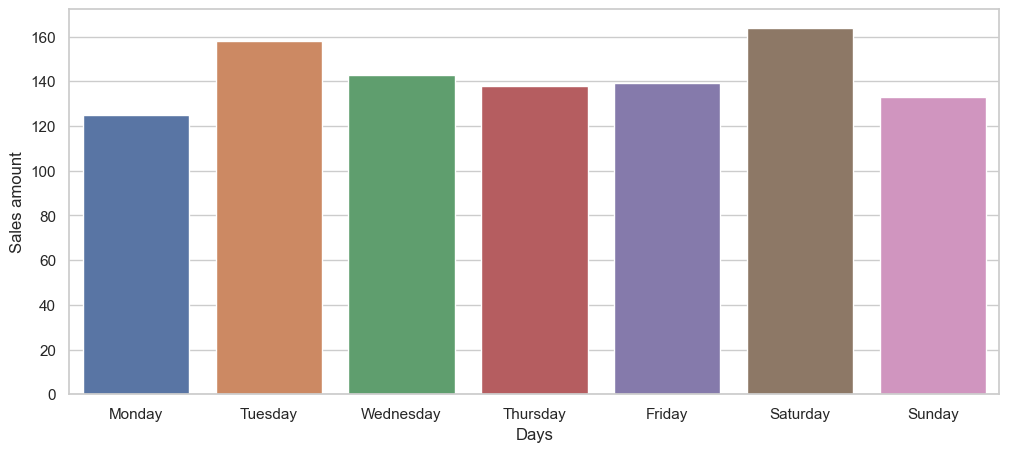

In [45]:
# Günler count plot kullanılarak haftanın hangi günlerinde ne kadar satış yapıldığı grafiğe aktarıldı.
ax = sns.countplot(data=df_days.sort_values('num'), x='days')
ax.set_ylabel('Sales amount')
ax.set_xlabel('Days')
plt.show()

In [93]:
branch_date_df = pd.concat([raw_data['Branch'], time_df, df_days], axis=1)

In [96]:
branch_date_df.head()

,Branch,Time Stamp,Rounded Times,days,num
0,A,1/5/2019 13:08,13:00,Saturday,6
1,C,3/8/2019 10:29,10:00,Friday,5
2,A,3/3/2019 13:23,13:00,Sunday,7
3,A,1/27/2019 20:33,20:00,Sunday,7
4,A,2/8/2019 10:37,10:00,Friday,5


In [103]:
branch_date_df.groupby(['Branch']).sum()

,num
Branch,
A,1377
B,1331
C,1324


<AxesSubplot:xlabel='Rounded Times', ylabel='count'>

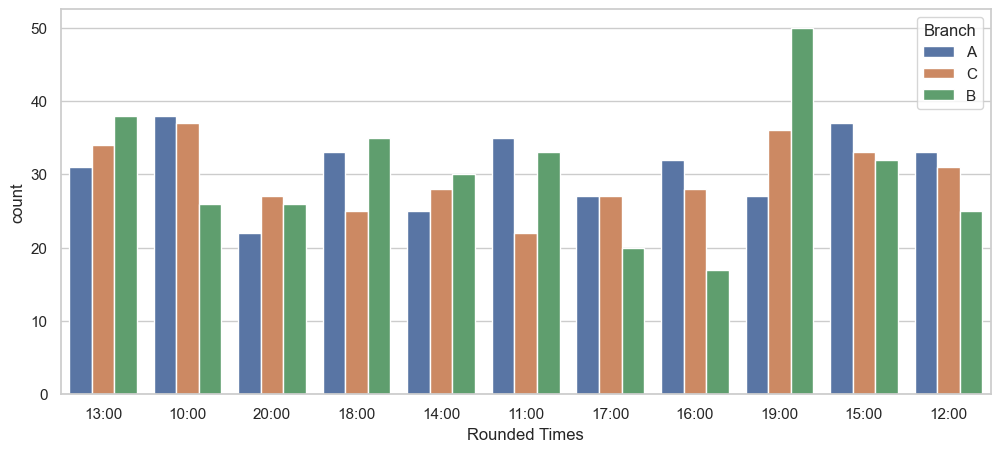

In [111]:
sns.countplot(data=branch_date_df, x=branch_date_df['Rounded Times'], hue='Branch')

<AxesSubplot:xlabel='days', ylabel='count'>

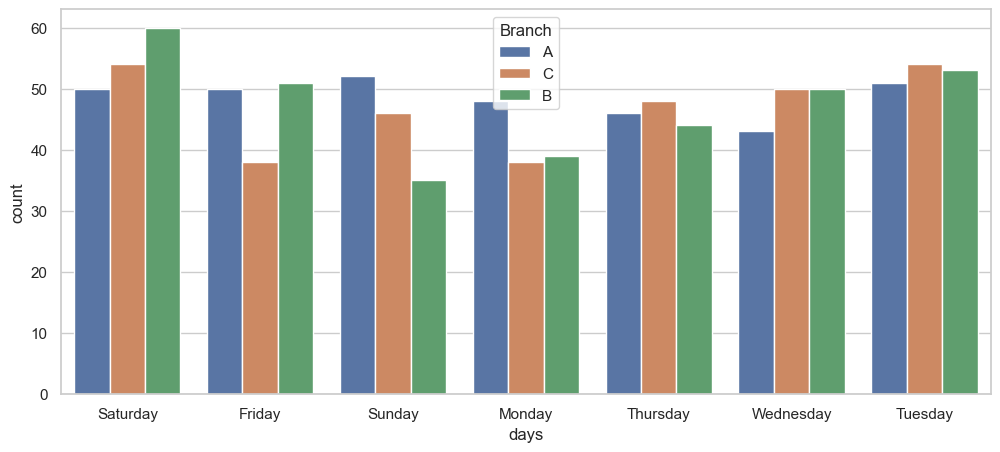

In [112]:
sns.countplot(data=branch_date_df, x=branch_date_df['days'], hue='Branch')

## WHICH TYPE OF CUSTOMERS ARE MOST SATISFIED WITH THEIR SHOPPING EXPERIENCE?
---

In [46]:
# Müşteri türlerine göre ortalama rating değerleri
raw_data.pivot_table(values=['Rating'], index=['Customer type'], aggfunc=np.average).sort_values(by='Rating', ascending=False)

,Rating
Customer type,
Normal,7.005210
Member,6.940319


En yüksek rating oranına sahip müşteri tipi → __Normal__

## WHICH BRANCH HAS THE MOST SALES ?
---

In [47]:
# Şubelerin satış sayıları
raw_data['Branch'].value_counts().sort_values(ascending=False)

A    340
B    332
C    328
Name: Branch, dtype: int64

En çok satış yapan şube → __A__

## IS THERE ANY RELATIONSHIP BETWEEN CUSTOMER TYPE AND PRODUCT LINE?
---

In [48]:
# ham veriden `Customer type` ve `Product line` kolonları ONE HOT ENCODING yapıldı.
customer_product_df = pd.get_dummies(data=raw_data[['Customer type', 'Product line']],columns=['Customer type', 'Product line'])

<AxesSubplot:>

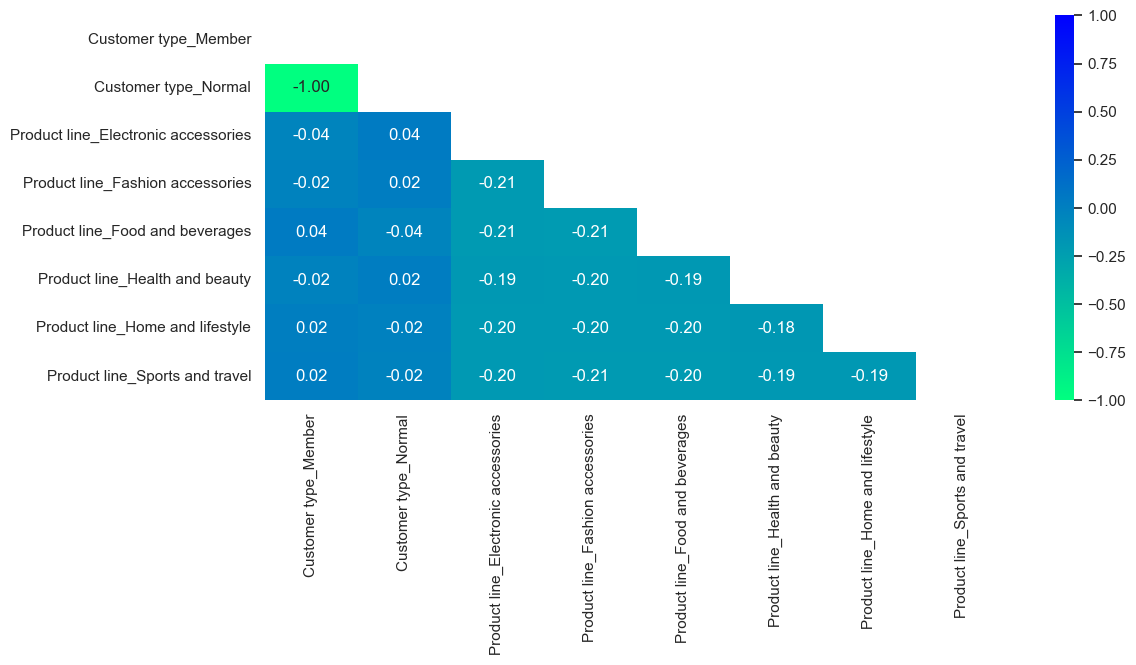

In [49]:
mask = np.zeros_like(customer_product_df.corr())
mask[np.triu_indices_from(mask)] = True

# Müşteri tipi ile ürünler arasındaki korelasyon grafiği oluşturuldu
sns.heatmap(customer_product_df.corr(), annot=True, fmt='.2f', cmap='winter_r', mask=mask, vmin=-1, vmax=1)

Müşteri tipi ile Ürün türleri arasındaki ilişki → __Yok (Çok zayıf)__

## TRAIN - TEST SPLIT
---

In [50]:
# ham verinin bir kopyası oluşturuldu
df = raw_data.copy()

In [51]:
# x ve y olmak üzere ilgili kolonlar seçildi
X = df[['Unit price', 'Tax 5%']]
y = df["Total"]

In [52]:
# 300 (test) 700(train) olmak üzere train test bölüntüleme işlemi yapıldı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
# Model nesneleri oluşturuldu ve ilgili parametreler dolduruldu
linear_regression_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=7)
tree_model = DecisionTreeRegressor(max_depth=3)
random_forest_model = RandomForestRegressor(max_depth=3, n_estimators=500)
ada_model = AdaBoostRegressor(n_estimators=50, learning_rate=.01)
gradient_boosting_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=.2)
xgb_model = XGBRegressor(max_depth=3, n_estimators=50, learning_rate=.2, objective="reg:squarederror")

In [55]:
# model isimleri ve nesneleri ziplendi
regressors = [('Linear Regression', linear_regression_model),
              ('K Neighbors Regressor', knn_model),
              ('Decision Tree Regressor', tree_model),
              ('Random Forest Regressor', random_forest_model),
              ('Ada Boost Regressor', ada_model),
              ('Gradient Boosting Regressor', gradient_boosting_model),
              ('XGB Regressor', xgb_model)]

In [56]:
# Her model r2 skorlar listesine eklenmesi için döngüyle
r2_scores = []

for regressor_name, model in regressors:
    # Modelin accuracy değeri alınarak listeye eklendi
    scores = cross_val_score(model, X_train, y_train.values.ravel(),  scoring="r2")
    r2_scores.append(scores.mean() * 100)

    print(f'r2 Score: {round(scores.mean(), 2)} \t model:{regressor_name}')

r2 Score: 1.0 	 model:Linear Regression
r2 Score: 0.99 	 model:K Neighbors Regressor
r2 Score: 0.98 	 model:Decision Tree Regressor
r2 Score: 0.99 	 model:Random Forest Regressor
r2 Score: 0.99 	 model:Ada Boost Regressor
r2 Score: 1.0 	 model:Gradient Boosting Regressor
r2 Score: 1.0 	 model:XGB Regressor


In [57]:
# Kategorik olan veriler için Label encoding yapılıyor
label_encoder = preprocessing.LabelEncoder()

for col in categorical_df.columns:
    df[col] = label_encoder.fit_transform(df[col])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [59]:
model = linear_regression_model.fit(X_train, y_train)

In [60]:
model.score(X_test, y_test) # Bağımsız değişken --> 'Unit price', 'Tax 5%'   Bağımlı değişken --> 'Total'

1.0

In [61]:
# Unique, ilişkisi düşük ve sabit olan feature'lar data frame'den silindi
clear_df = df.drop(['Invoice ID', 'Date', 'Time', 'Gross margin percentage'], axis=1)

In [62]:
clear_df.head(8)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Cogs,Gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,30.2085,5.3
5,2,1,1,1,0,85.39,7,29.8865,627.6165,2,597.73,29.8865,4.1
6,0,2,0,0,0,68.84,6,20.6520,433.6920,2,413.04,20.6520,5.8
7,2,1,1,0,4,73.56,10,36.7800,772.3800,2,735.60,36.7800,8.0


In [63]:
# Multicollinearity (kendi aralarında korelasyonu 1 veya -1 olan) durumunda olan feature'lar drop edildi.
X = clear_df.drop(['Rating', 'City', 'Tax 5%', 'Cogs', 'Gross income'], axis=1)
y = clear_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [64]:
# OLS Regression model'e y_train ve X_train dataset'leri verilerek eğitildi
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              945.8
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:28:49   Log-Likelihood:                         -1507.0
No. Observations:                 700   AIC:                                      3030.
Df Residuals:                     692   BIC:                                      3066.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Branch            0.4637      0.094      4.949      0.000       0.280       0.648
Customer type     0.5236      0.156      3.355      0.001       0.217       0.830
Gender            0.4829      0.158      3.062      0.002       0.173       0.792
Product line      0.1339      0.045      2.981      0.003       0.046       0.222
Unit price        0.0795      0.004     20.273      0.000       0.072       0.087
Quantity          0.7896      0.038     20.620      0.000       0.714       0.865
Total            -0.0111      0.001    -16.050      0.000      -0.012      -0.010
Payment           0.2969      0.094      3.160      0.002       0.112       0.481
==============================================================================
Omnibus:                       16.257   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.897
Skew:                           0.126   Prob(JB):                      0.00710
Kurtosis:                       2.475   Cond. No.                         835.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# OLS model'e test verisi verilerek tahminler istendi
predicts = results.predict(X_test)

In [66]:
# `Rating` değeri ile bağımsız değişkenlerin arasındaki ilişki tablosu
results.params.sort_values(ascending=False)

Quantity         0.789621
Customer type    0.523607
Gender           0.482886
Branch           0.463663
Payment          0.296884
Product line     0.133950
Unit price       0.079473
Total           -0.011072
dtype: float64

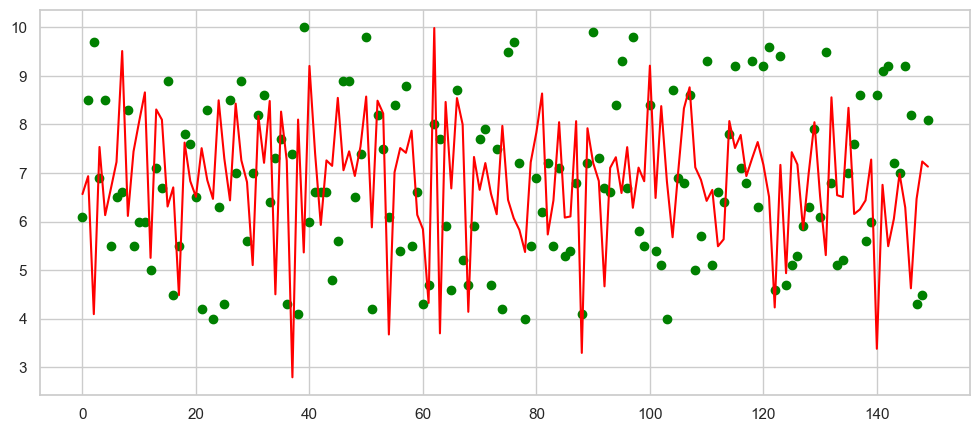

In [67]:
# OLS model'e göre ilk 150 veri ve tahmin'ler (Model underfit değildir overfit tespiti için daha çok veri gerekebilir.)
plt.scatter(range(150), y_test[:150], c="green")
plt.plot(range(150), predicts[:150], c="red")
plt.show()

In [68]:
# `Rating` feature'ı için linear regression modeli eğitildi
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Test verisi verilerek tahminler alındı
y_pred = linear_regression_model.predict(X_test)

In [70]:
mean_squared_error(y_pred, y_test) # 0'a yakın olmadığı için hatalı bir modeldir

2.8590644052622385

In [71]:
# Score ekrana basıldı
linear_regression_model.score(X_test, y_test)

-0.006836546203120797

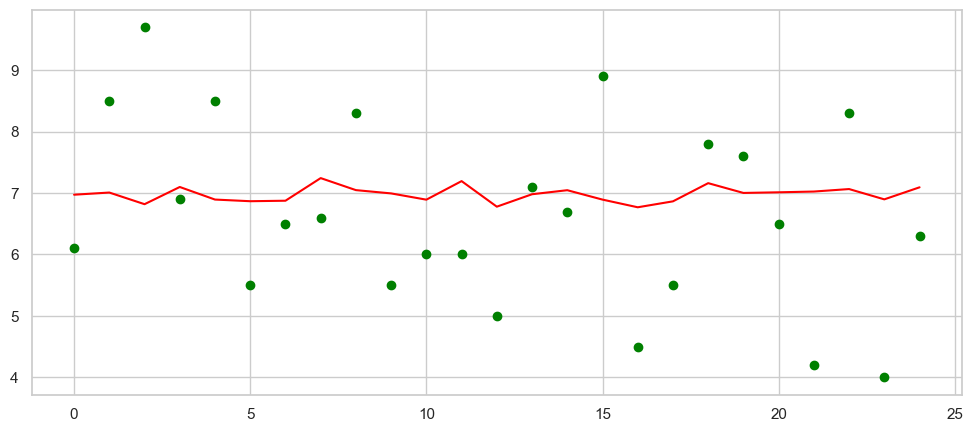

In [72]:
# Lineer model'e göre ilk 25 veri ve tahmin'ler (Model underfit'tir)
plt.scatter(range(25), y_test[:25], c="green")
plt.plot(range(25), y_pred[:25], c="red")
plt.show()

In [73]:
from scipy.stats import shapiro

In [74]:
# Normallik testi için shapiro wilk testi tercih edilmiştir. (2000 kayda kadar etkili bir testtir.)
shapiro(y_train)

ShapiroResult(statistic=0.955135703086853, pvalue=8.925143474758021e-14)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

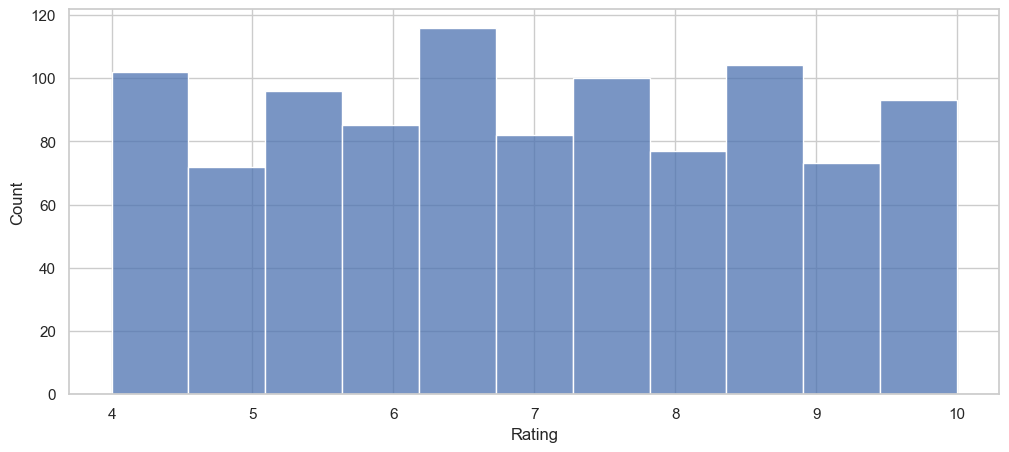

In [75]:
# p-value değeri 0.05 e yakın olmadığı için verilerimiz normal dağılımda değildir.
sns.histplot(clear_df.Rating)

In [76]:
for col in X_train.columns:
    print(f'{col}\n{shapiro(X_train[col])}\n')

Branch
ShapiroResult(statistic=0.792935848236084, pvalue=6.617223251309898e-29)

Customer type
ShapiroResult(statistic=0.6365197896957397, pvalue=5.5783570859415366e-36)

Gender
ShapiroResult(statistic=0.6359063982963562, pvalue=5.2977207240493626e-36)

Product line
ShapiroResult(statistic=0.9018792510032654, pvalue=9.033938353311385e-21)

Unit price
ShapiroResult(statistic=0.9561137557029724, pvalue=1.3336096007891818e-13)

Quantity
ShapiroResult(statistic=0.9288207292556763, pvalue=1.032780655142268e-17)

Total
ShapiroResult(statistic=0.9102025628089905, pvalue=6.709353067531959e-20)

Payment
ShapiroResult(statistic=0.7878631353378296, pvalue=3.412893509906226e-29)



In [77]:
import plotly.express as px

# fig = px.scatter_matrix(clear_df, width=1200, height=1600)
# fig.show()

<AxesSubplot:xlabel='Rating', ylabel='Count'>

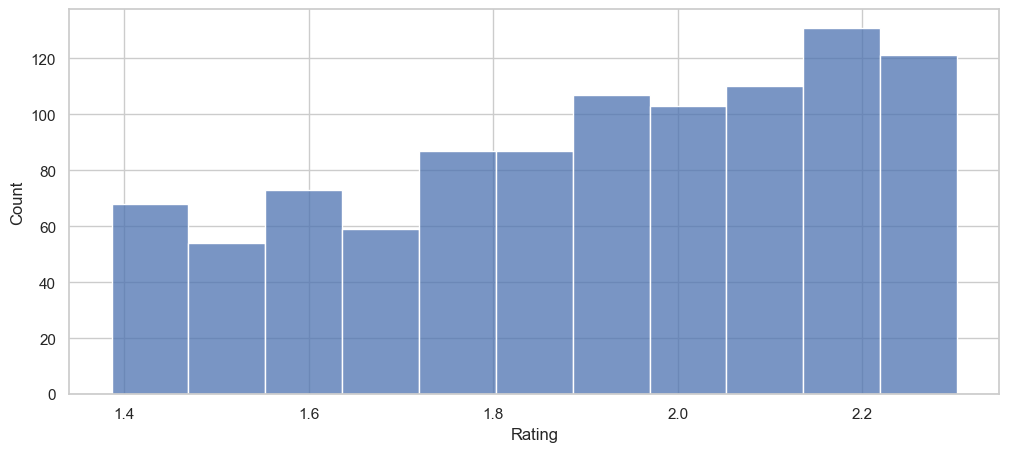

In [78]:
# Verileri normal dağılıma getirmek için Log Transformation işlemi yapıldı // Log — Level Regression
sns.histplot(np.log(clear_df['Rating']))

In [79]:
# box plot yöntemiyle akırı olan verileri döndüren fonksiyon
def iqr(df, col):
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    diff = q3 - q1
    lower_t = q1 - (1.5 * diff)
    upper_t = q3 + (1.5 * diff)
    return df[(df[col] < lower_t) | (df[col] > upper_t)]

In [80]:
# Train verisetinde aykırı olan Total verileri
iqr(X_train, 'Total')

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment
350,2,0,0,1,99.30,10,1042.650,1
557,2,0,0,2,98.52,10,1034.460,2
792,1,1,0,4,97.37,10,1022.385,1
699,2,1,1,4,97.50,10,1023.750,2
167,0,1,1,1,98.98,10,1039.290,1


In [81]:
y_train[[350, 557, 792, 699, 167]]

350    6.6
557    4.5
792    4.9
699    8.0
167    8.7
Name: Rating, dtype: float64

In [82]:
X = clear_df.drop(['Customer type', 'City', 'Tax 5%', 'Cogs', 'Gross income'], axis=1)
y = clear_df['Customer type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [83]:
X_train.head()

,Branch,Gender,Product line,Unit price,Quantity,Total,Payment,Rating
822,2,1,5,10.17,1,10.6785,0,5.9
188,0,1,4,74.07,1,77.7735,2,9.9
251,2,1,1,35.19,10,369.4950,1,8.4
71,2,1,1,62.12,10,652.2600,0,5.9
664,2,0,5,98.80,2,207.4800,0,7.7


In [84]:
from itertools import combinations

In [85]:
# max = 0.50
# for i in range(2, 3):
#     for col in X_train.columns:
#         cols = [comb for comb in combinations(X_train.columns, r=i)]
#
#         for tup in cols:
#
#             try:
#                 train = X_train[list(tup)]
#                 model = KMeans(n_clusters=i)
#                 model.fit(train)
#                 predicts = model.fit_predict(X_test)
#                 score = sklearn.metrics.accuracy_score(predicts, y_test)
#
#                 if score > max:
#                     print(f'i: {i} \t feature list:{tup} \t score: {score}')
#                     max = score
#             except:
#                 pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

i: 2 	 feature list:('Branch', 'Total') 	 score: 0.55


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>